## Forest Cover type classification - Multiclass Classification.

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore') # Check

In [4]:
# Upload Dataset and check head (First five observations).
data = pd.read_csv('train.csv')
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# Check the types of data used to store the data. All are int64 type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [6]:
# Use describe to check the basic statistical analysis metrices like mean, median, mode, Quantiles, etc...
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
# Check is there any null values present in the dataset
data.isnull().sum()

,0
Id,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0


In [8]:
# Drop ID column which is having no relationship with other features
data.drop(['Id'],axis = 1, inplace = True)

In [9]:
# Check Duplicates are present in the dataset
duplicate_rows = data.duplicated().sum()
print('Number of duplicates:', duplicate_rows)

Number of duplicates: 0


In [10]:
## In the given dataset first 10 columns are numerical features, Other independent columns are one hot encoded values. The dependent column is having 7 different labels.

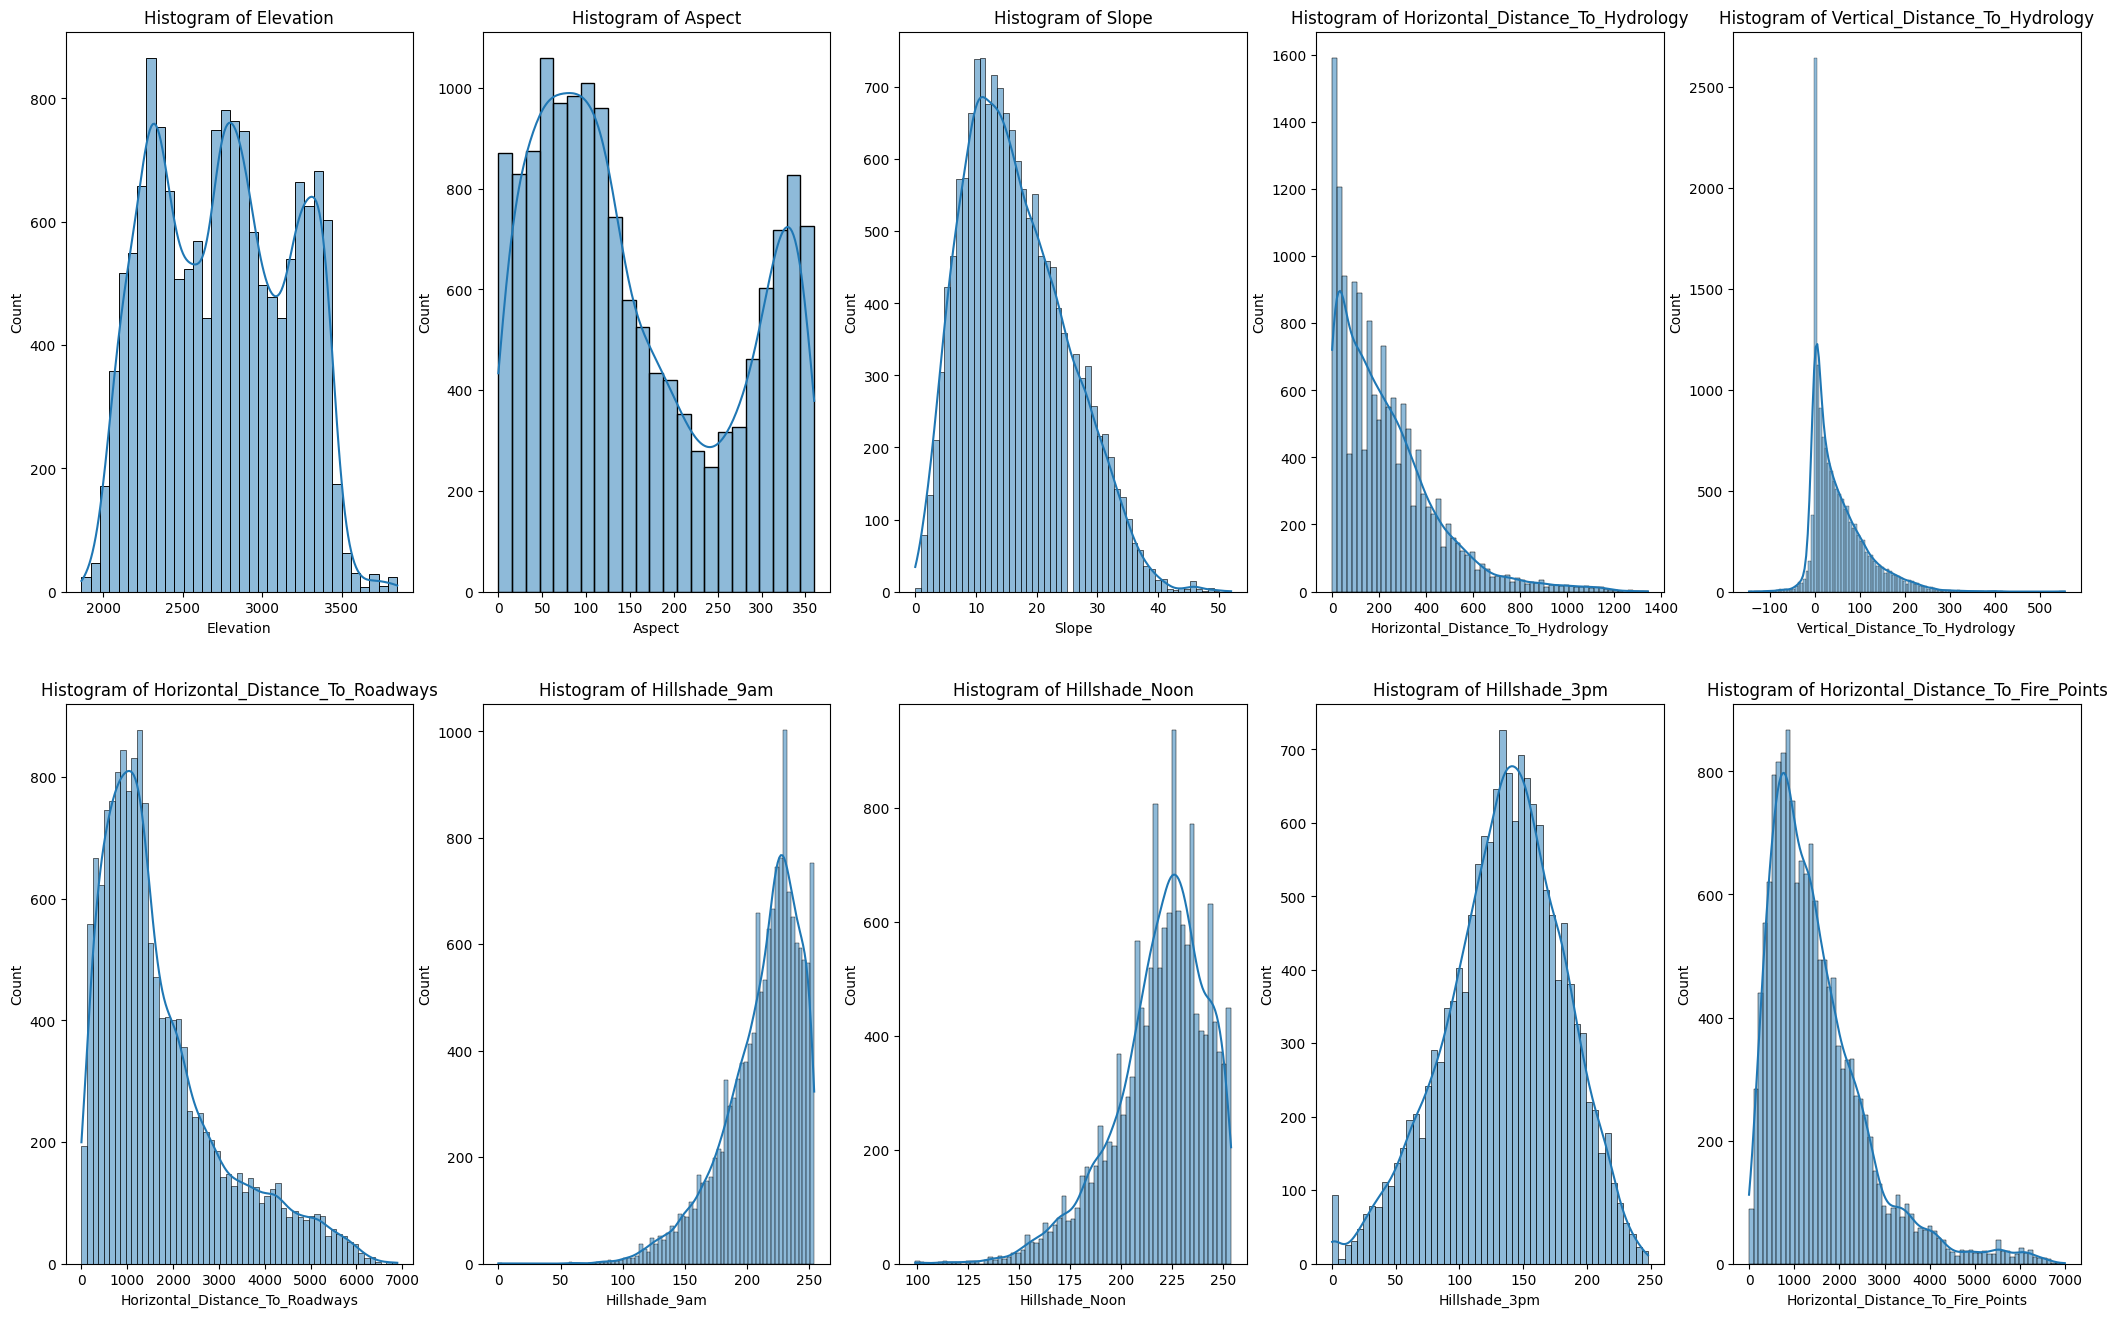

In [11]:
# Seperating the numerical columns and vizualizing
num_cols = data.iloc[:,0:10]
fig, axes = plt.subplots(2, 5, figsize=(26,16))
axes = axes.flatten()
for i, col in enumerate(num_cols.columns):
    sns.histplot(num_cols[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
plt.show()

In [12]:
# There is skewness present in 4 features. We remove skewness in the next step.

In [13]:
# Removing skewness
print(f"Before removing skewness on Horizontal_Distance_To_Roadways,{data['Horizontal_Distance_To_Roadways'].skew()}")
data['Horizontal_Distance_To_Roadways'] = np.log1p(data['Horizontal_Distance_To_Roadways']) # Right skewed
print(f"After removing skewness on Horizontal_Distance_To_Roadways,{data['Horizontal_Distance_To_Roadways'].skew()}")

print(f"Before removing skewness on Horizontal_Distance_To_Fire_Points ,{data['Horizontal_Distance_To_Fire_Points'].skew()}")
data['Horizontal_Distance_To_Fire_Points'] = np.log1p(data['Horizontal_Distance_To_Fire_Points']) # Right skewed
print(f"After removing skewness on Horizontal_Distance_To_Fire_Points ,{data['Horizontal_Distance_To_Fire_Points'].skew()}")

print(f"Before removing skewness on Hillshade_9am, {data['Hillshade_9am'].skew()}")
data['Hillshade_9am'] = data['Hillshade_9am'] ** 3 #Left skewed
print(f"After removing skewness on Hillshade_9am, {data['Hillshade_9am'].skew()}")

print(f"Before removing skewness on Hilshade_Noon, {data['Hillshade_Noon'].skew()}")
data['Hillshade_Noon'] = data['Hillshade_Noon'] ** 3 # Left skewed
print(f"After removing skewness on Hilshade_Noon, {data['Hillshade_Noon'].skew()}")

# Below values shows some reduction in skewness

Before removing skewness on Horizontal_Distance_To_Roadways,1.247810678465482
After removing skewness on Horizontal_Distance_To_Roadways,-0.6892190307043192
Before removing skewness on Horizontal_Distance_To_Fire_Points ,1.6170988738848289
After removing skewness on Horizontal_Distance_To_Fire_Points ,-0.6708653924261154
Before removing skewness on Hillshade_9am, -1.0936805605383073
After removing skewness on Hillshade_9am, -0.3561146737542126
Before removing skewness on Hilshade_Noon, -0.9532317074981783
After removing skewness on Hilshade_Noon, -0.3330799574439243


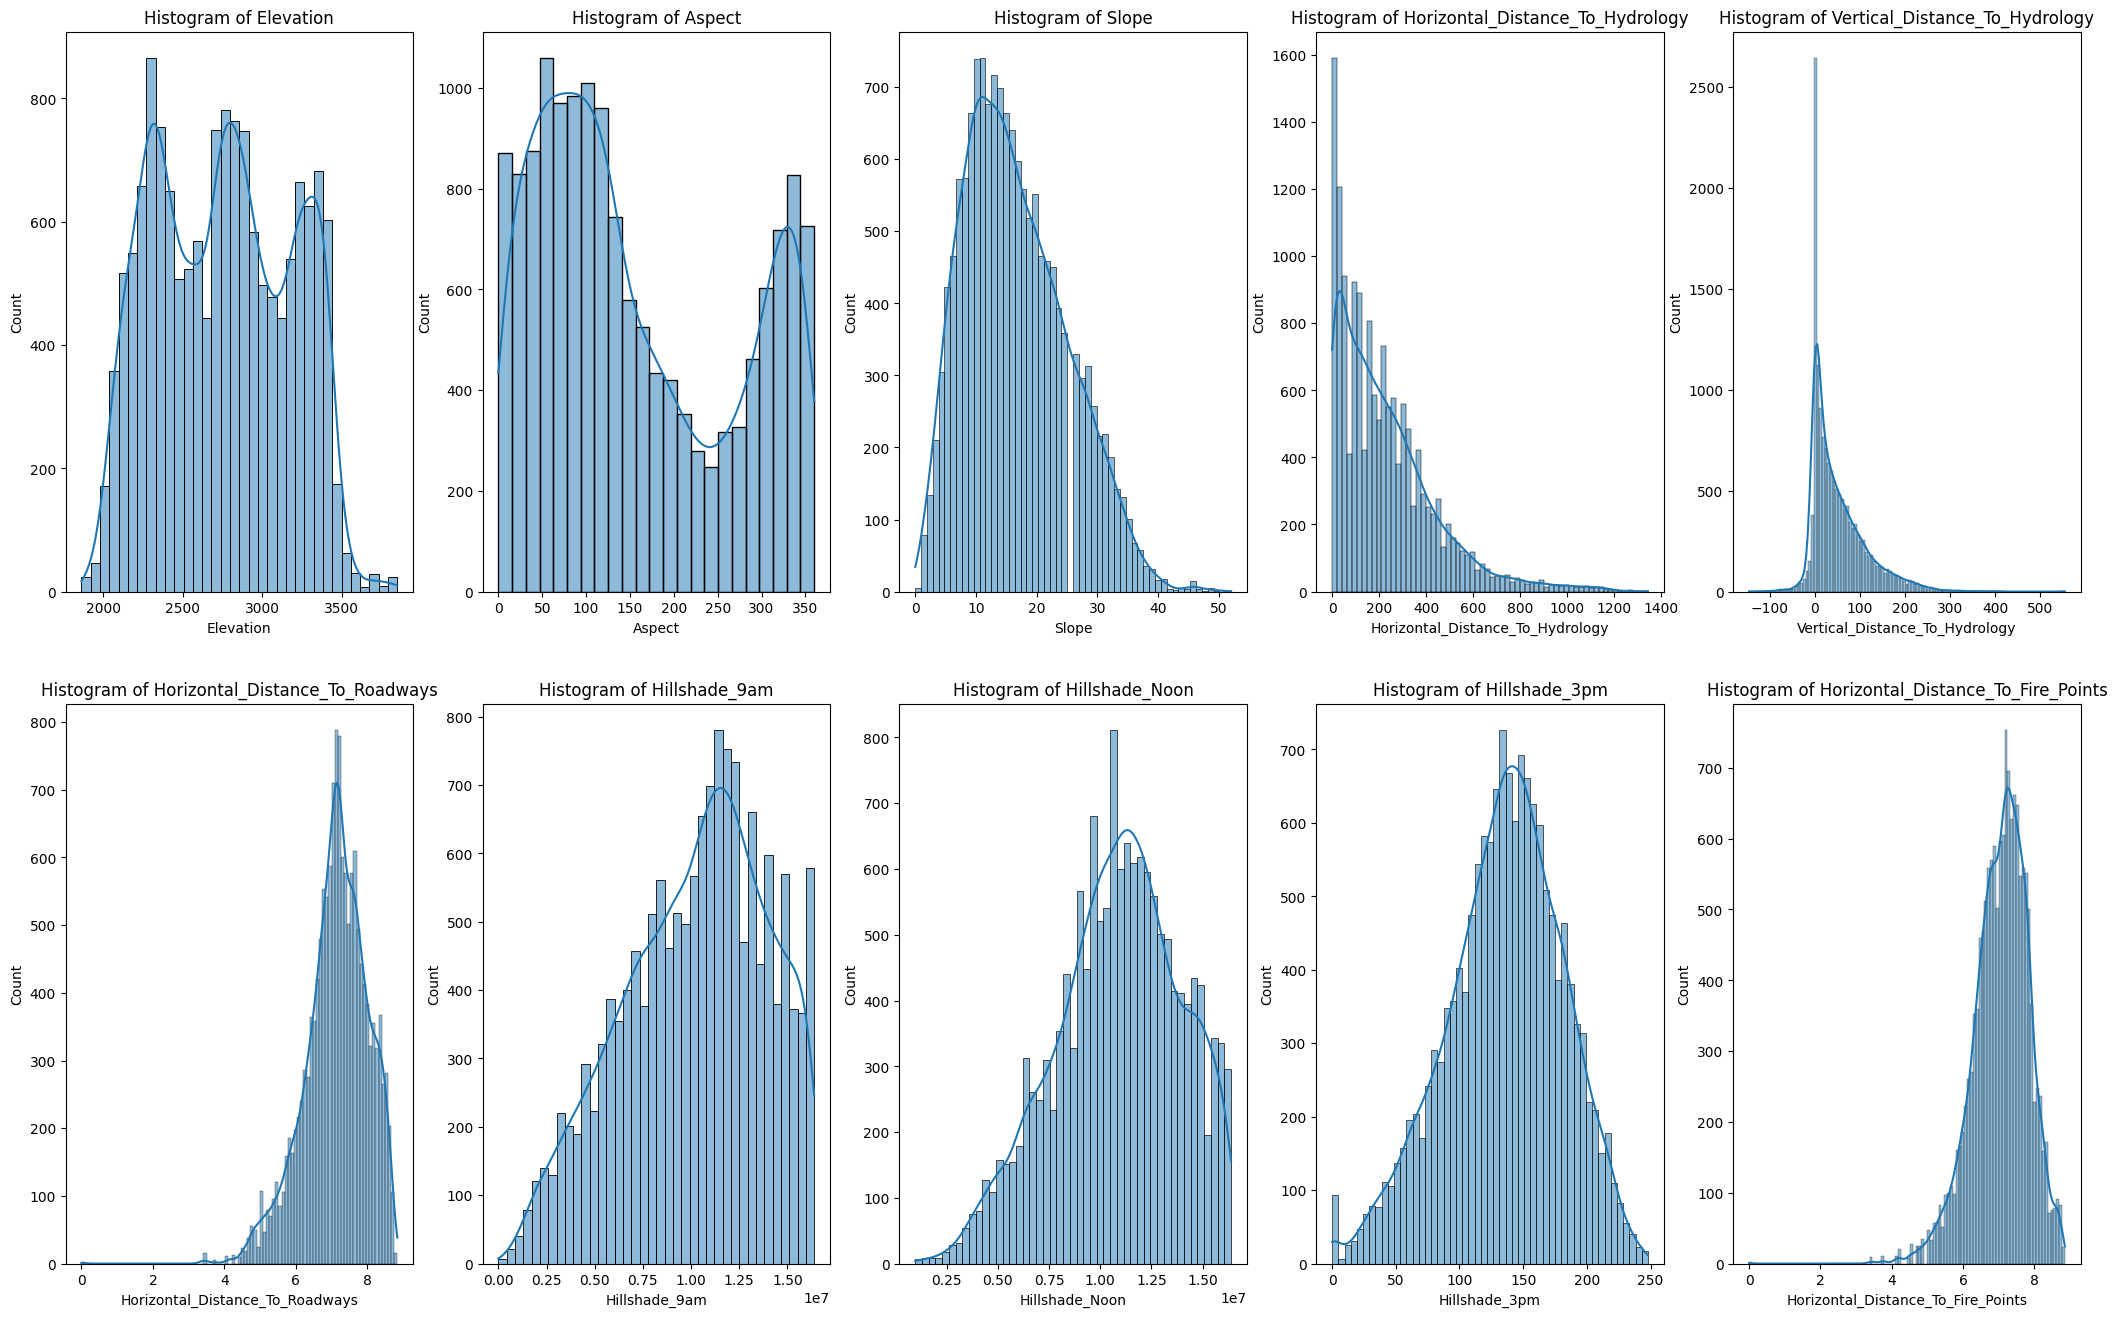

In [14]:
# After removing skewness
num_cols = data.iloc[:,0:10]
fig, axes = plt.subplots(2, 5, figsize=(26,16))
axes = axes.flatten()
for i, col in enumerate(num_cols.columns):
    sns.histplot(num_cols[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
plt.show()

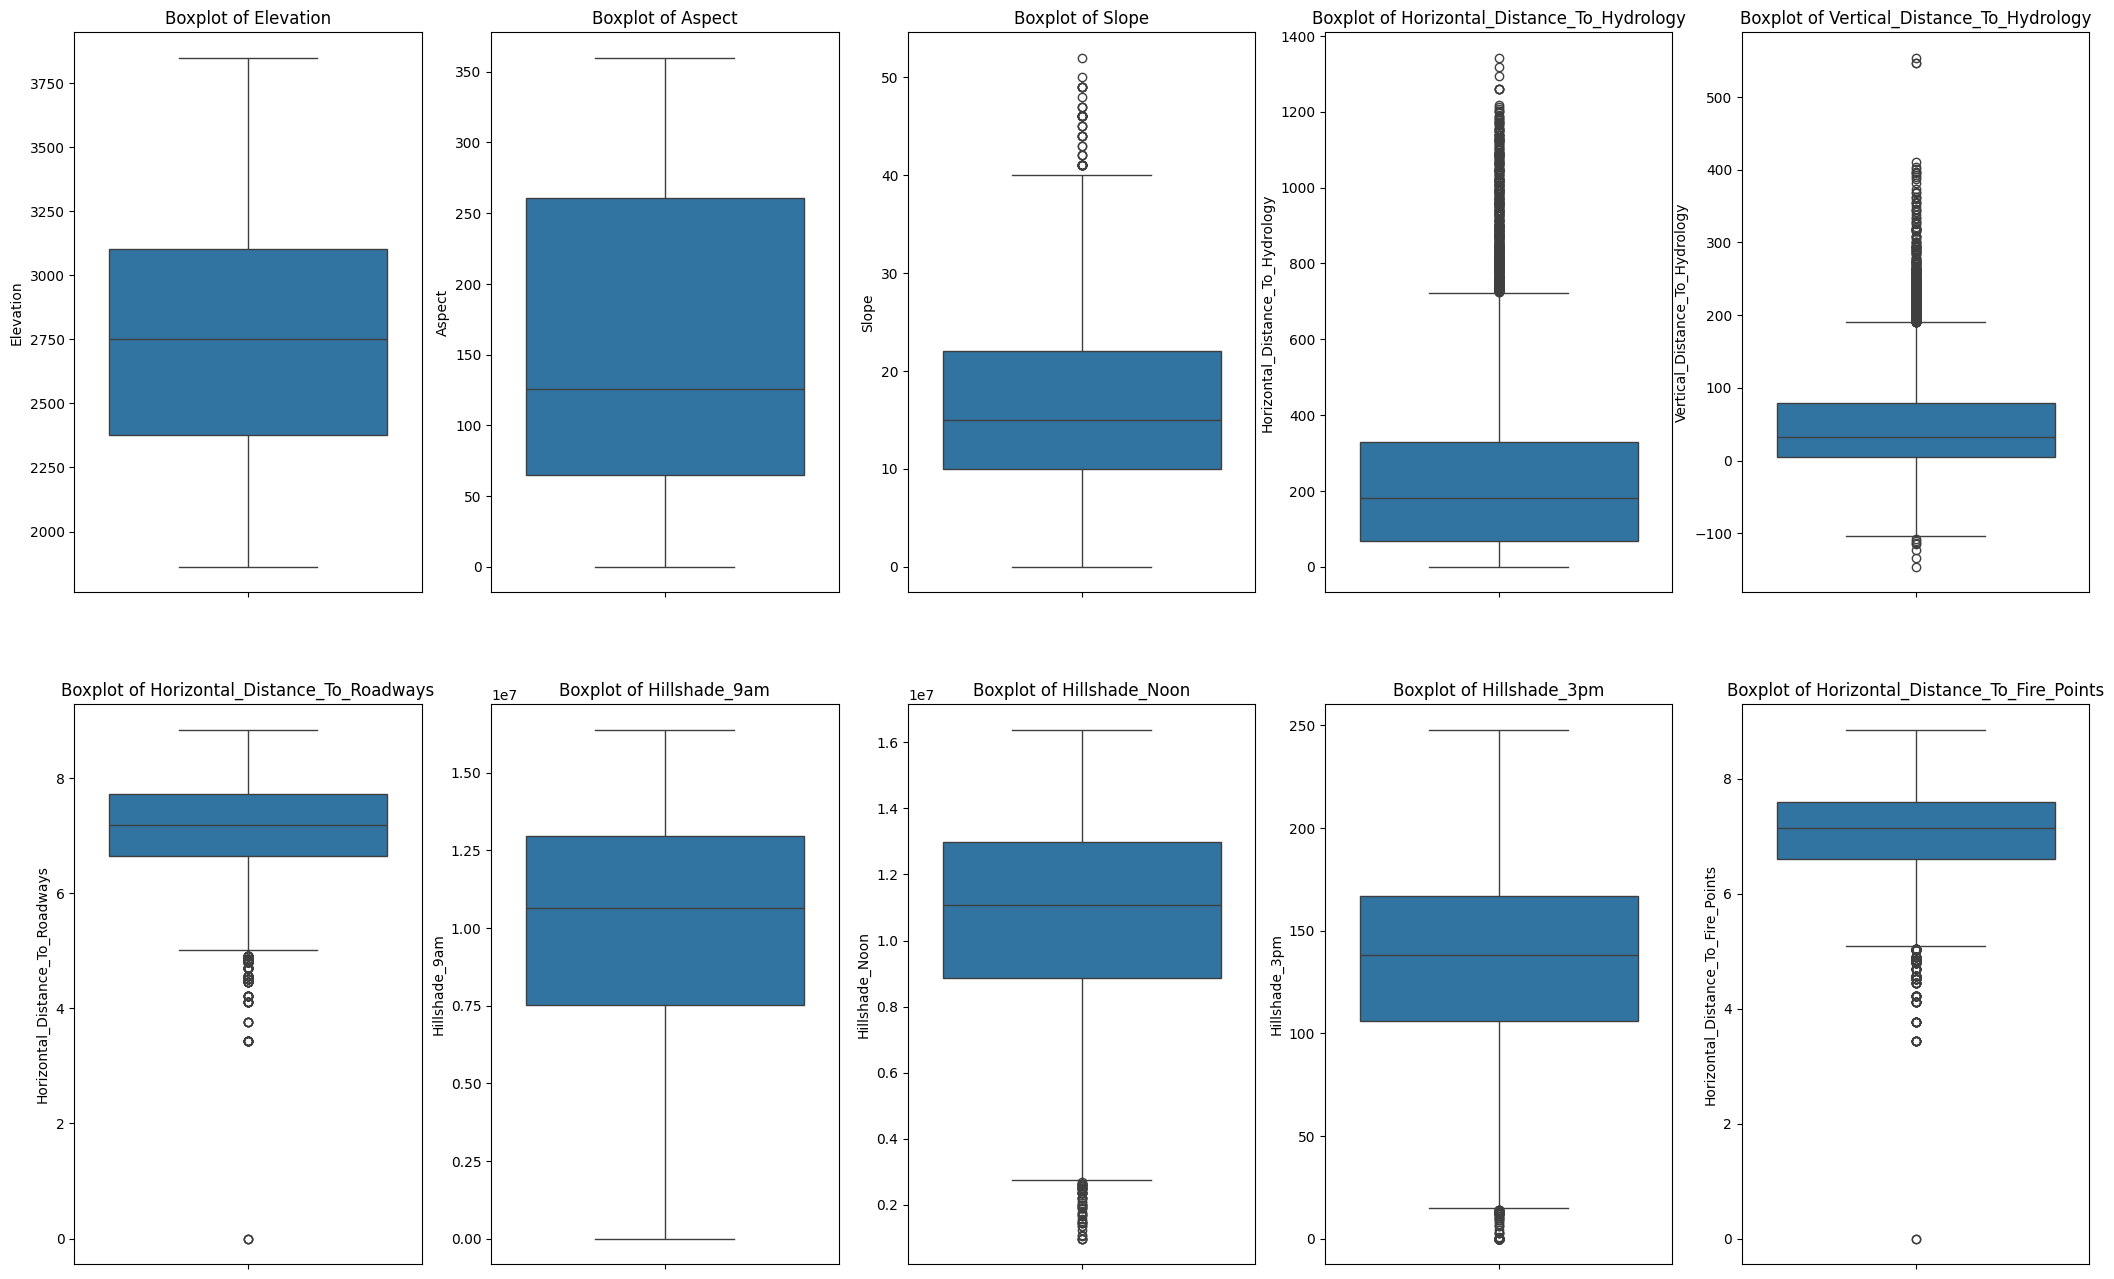

In [15]:
# Checking for outliers
fig_2, axes_2 = plt.subplots(2, 5, figsize=(26,16))
axes_2 = axes_2.flatten()
for i, col in enumerate(num_cols.columns):
    sns.boxplot(num_cols[col], ax=axes_2[i])
    axes_2[i].set_title(f'Boxplot of {col}')
plt.show()

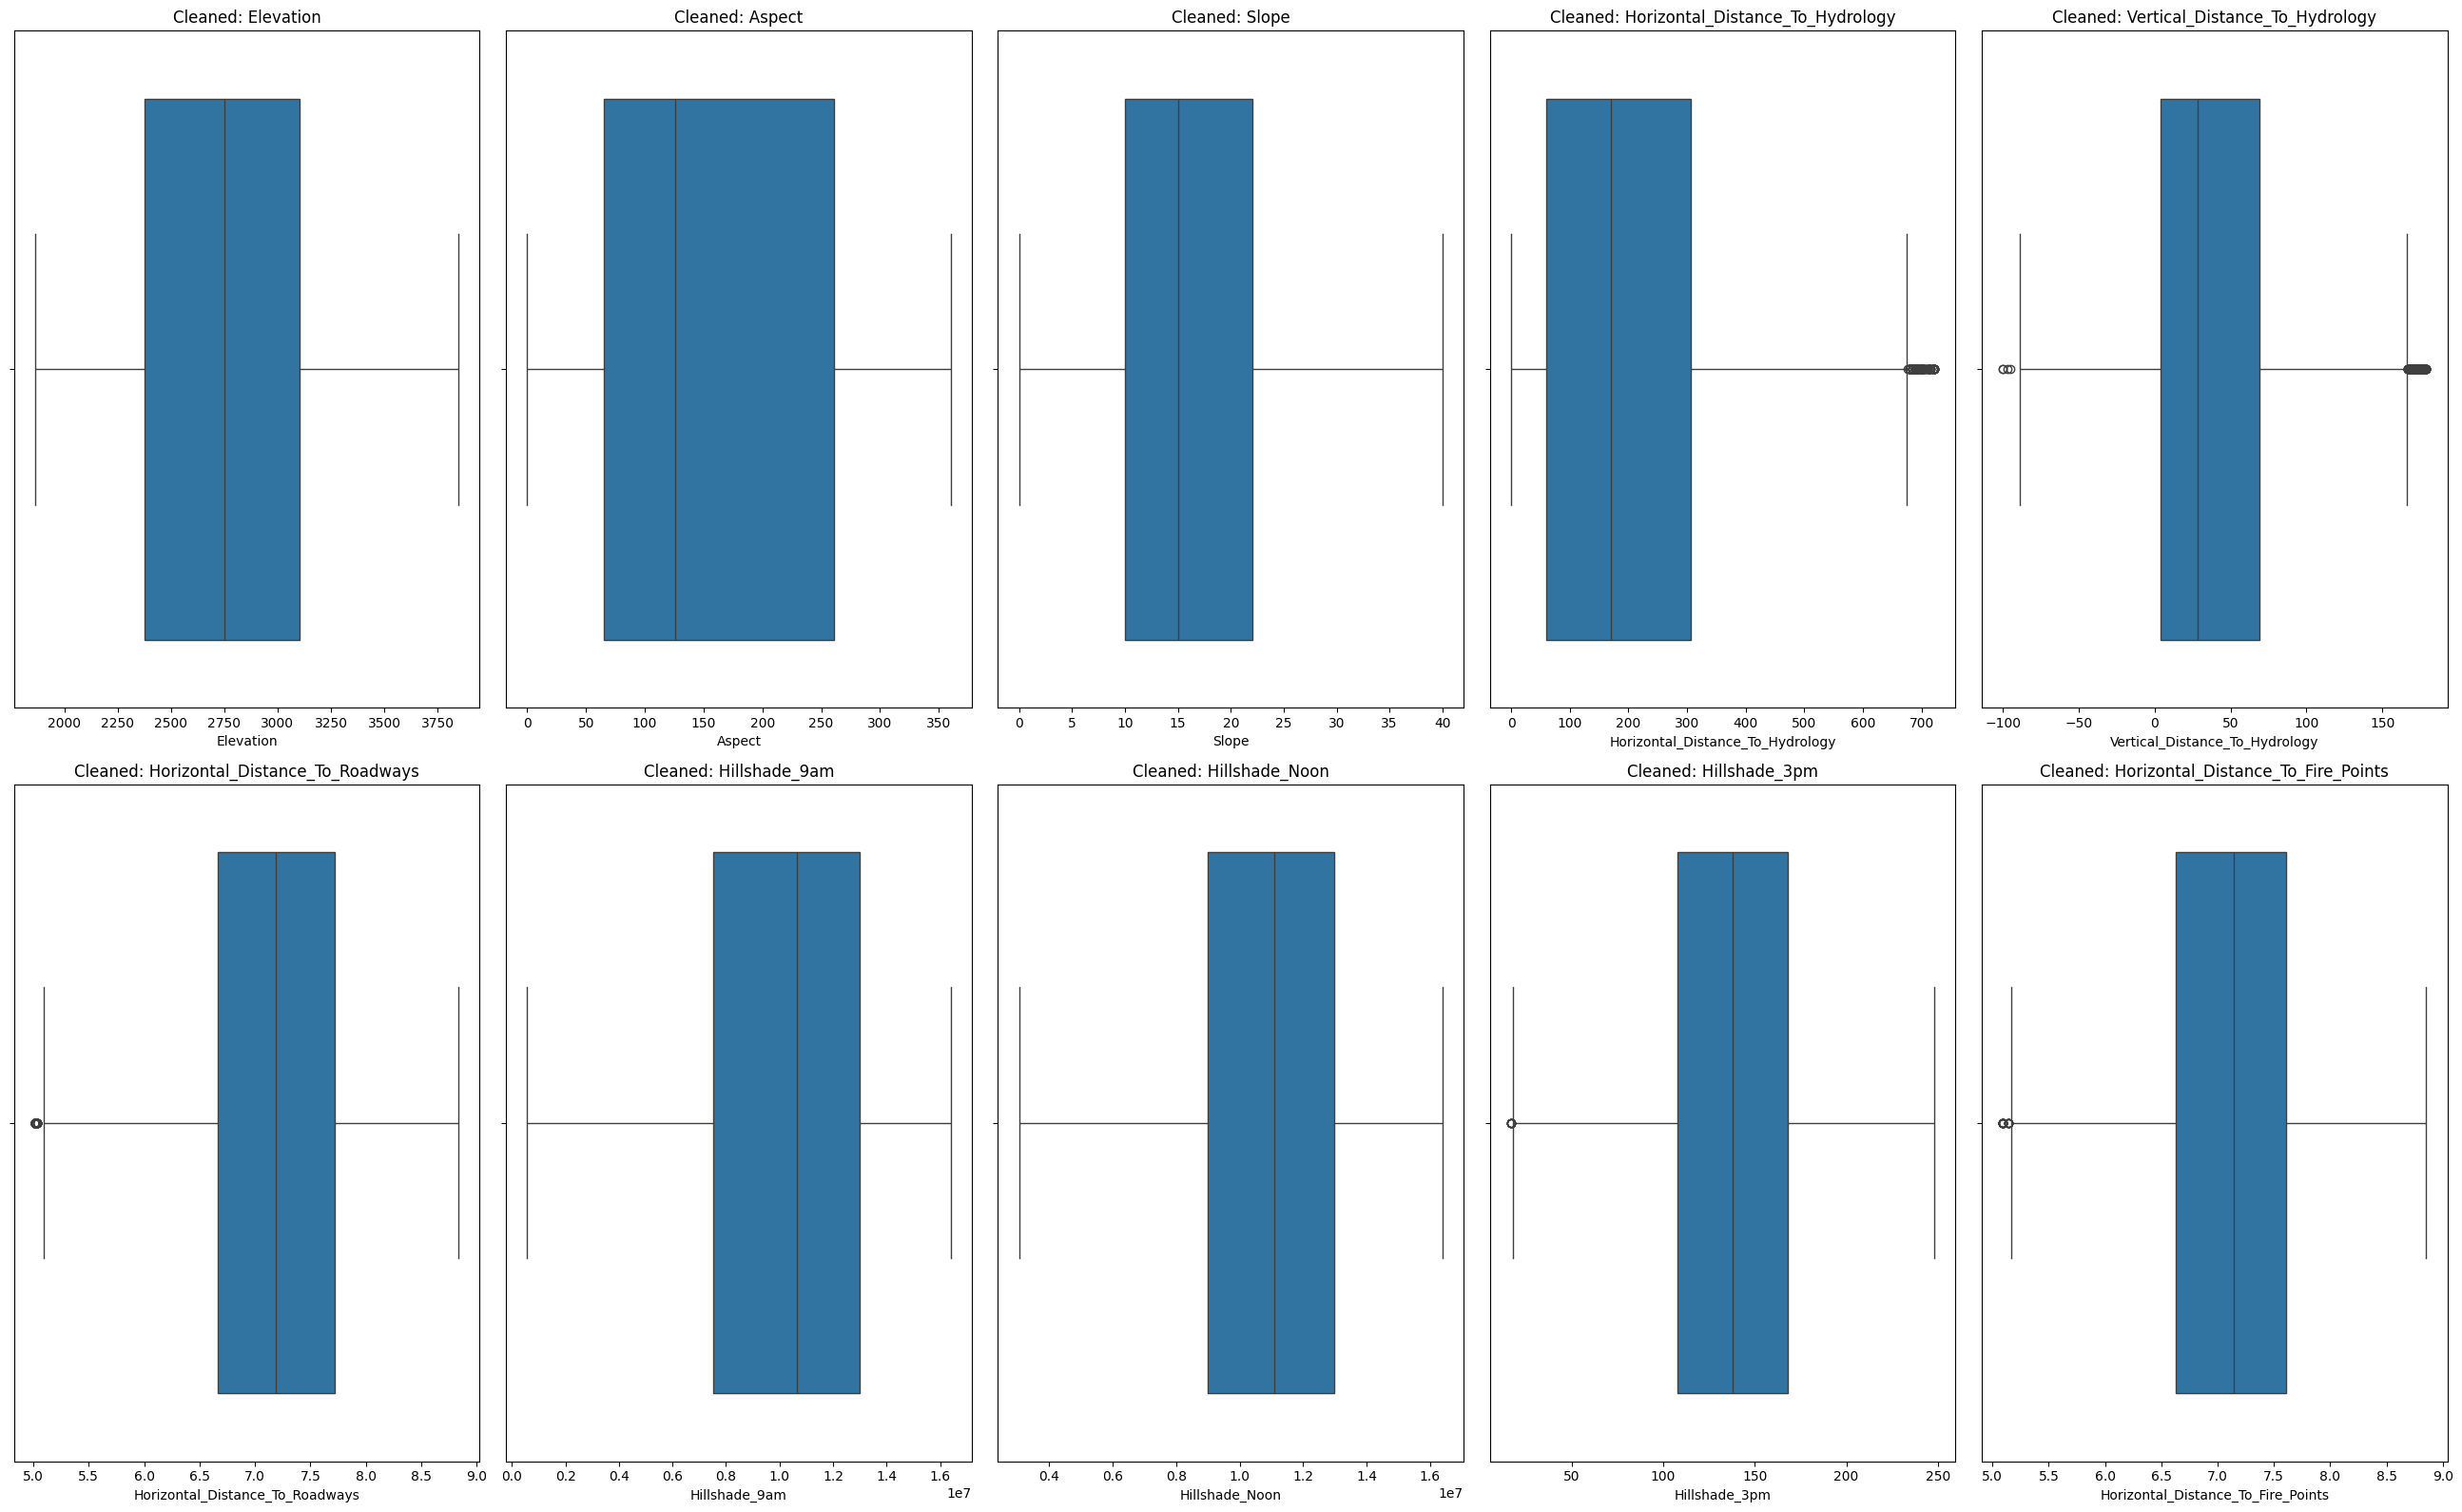

In [16]:
# Remove Outliers
fig_3, axes_3 = plt.subplots(2, 5, figsize=(26,16))
axes_3 = axes_3.flatten()
for i ,col in enumerate(num_cols.columns):
  Q1 = num_cols[col].quantile(0.25)
  Q3 = num_cols[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  num_cols = num_cols[(num_cols[col] >= lower_bound) & (num_cols[col] <= upper_bound)] # This varible stores the data after removing outliers

  Outliers_ = num_cols[(num_cols[col] < lower_bound) | (num_cols[col] > upper_bound)] # This variable stores the outliers
  sns.boxplot(x = num_cols[col], ax = axes_3[i])
  axes_3[i].set_title(f"Cleaned: {col}")
  plt.tight_layout()
plt.show()


In [17]:
#num_cols.shape
#num_cols.isna().sum()

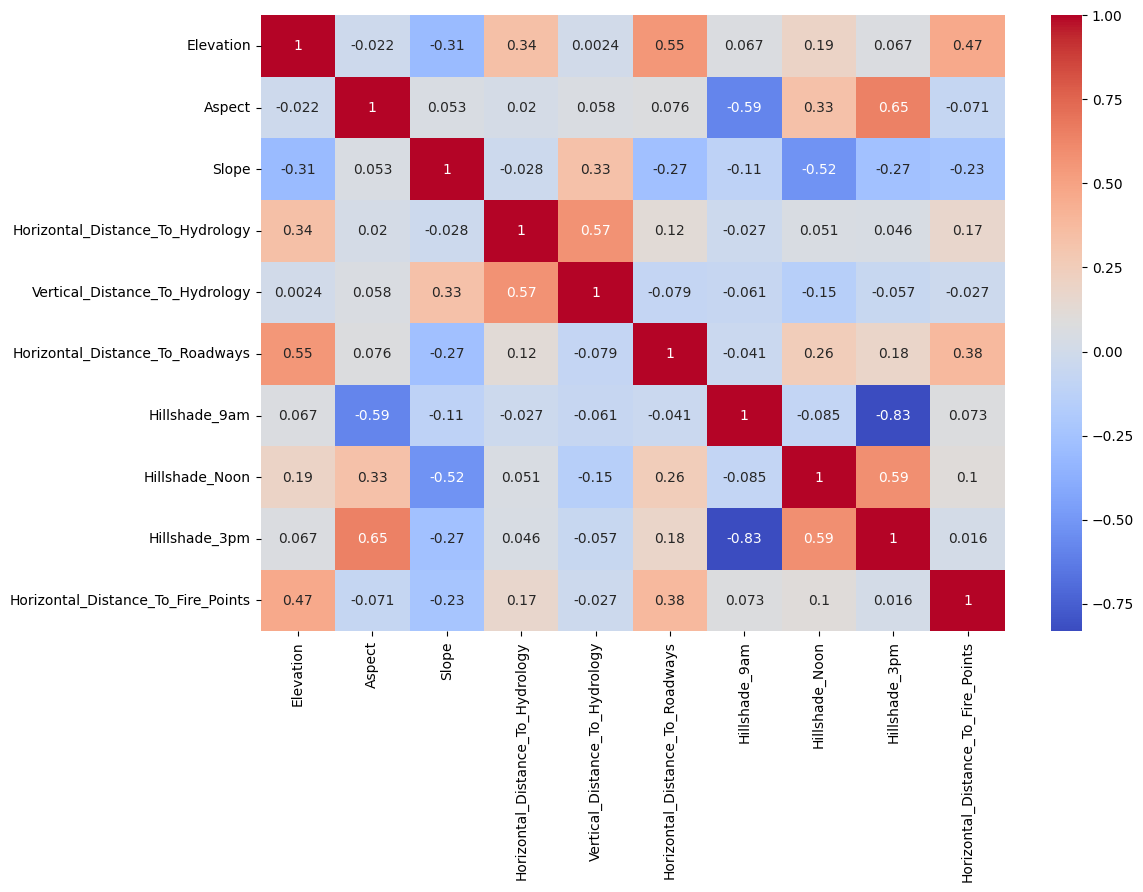

In [18]:
# Check Correlation between each numerical columns using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.show()
# Hillshade 3pm and 9pm are moderate-negatively correlated.


In [19]:
# Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(num_cols)
scaled_data = pd.DataFrame(scaled_data, columns=num_cols.columns)
scaled_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,0.400687,0.142061,0.075,0.357341,0.358423,0.319076,0.646342,0.707620,0.567100,0.971354
1,0.397252,0.155989,0.050,0.293629,0.336918,0.249020,0.637119,0.744409,0.580087,0.969056
2,0.519748,0.387187,0.225,0.371191,0.591398,0.797675,0.774006,0.782149,0.510823,0.964575
3,0.508872,0.431755,0.450,0.335180,0.781362,0.790163,0.816267,0.782149,0.454545,0.968458
4,0.400114,0.125348,0.050,0.211911,0.354839,0.249688,0.637119,0.732041,0.575758,0.966782


In [20]:
# Concating the numerical columns with the other one hot encoded columns and output variable.

encoded_cols = data.iloc[:,10:]
final_data = pd.concat([scaled_data, encoded_cols], axis=1)


In [21]:
# Check for null values, Since we removed some of the numerical observations before concating, So the number of observations in numrical columns and others columns are different.
# Check weahter the output labels are balanced.
final_data.isnull().sum()
final_data = final_data.dropna()
final_data['Cover_Type'].value_counts()


,count
Cover_Type,
4,2160
2,1966
6,1960
5,1944
3,1920
1,1845
7,1699


In [22]:
# Split input and output features seperately to apply SMOTE. Since the output labels are imbalanced.
X = final_data.drop('Cover_Type', axis=1)
y = final_data['Cover_Type']

In [23]:
# Train test split
from sklearn.model_selection import train_test_split
X_train_b4smote, X_test, y_train_b4smote, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#Apply SMOTE on available train data.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train_b4smote,y_train_b4smote)
y_train.value_counts()

,count
Cover_Type,
3,1701
7,1701
2,1701
4,1701
6,1701
1,1701
5,1701


In [25]:
# SVM Classifier
from sklearn.svm import SVC
from sklearn.metrics import *
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svc_test = svm_classifier.predict(X_test)
y_pred_svc_train = svm_classifier.predict(X_train)
accuracy_svc_test = accuracy_score(y_test, y_pred_svc_test)
accuracy_svc_train = accuracy_score(y_train,y_pred_svc_train)
print("Accuracy on test data:", accuracy_svc_test)
print("Accuracy on train data:", accuracy_svc_train)

Accuracy on test data: 0.6280103742126714
Accuracy on train data: 0.6171999664063156


In [42]:
# Confusion matrix and Classification report.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc_test))

Confusion Matrix:
[[172 113   0   0  22   6  42]
 [ 83 262  13   0  71  13   2]
 [  0   0 205  73  11  98   0]
 [  0   0  47 371   0  41   0]
 [ 25  79  23   0 218  13   0]
 [ 12   8  98  35  20 198   0]
 [ 31  23   1   0   1   0 269]]

Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.48      0.51       355
           2       0.54      0.59      0.56       444
           3       0.53      0.53      0.53       387
           4       0.77      0.81      0.79       459
           5       0.64      0.61      0.62       358
           6       0.54      0.53      0.54       371
           7       0.86      0.83      0.84       325

    accuracy                           0.63      2699
   macro avg       0.63      0.63      0.63      2699
weighted avg       0.63      0.63      0.63      2699



In [ ]:
# Since the there is not much differencr between train and test accuracies, our model is well generalized.

In [26]:
# SVM Classifier with hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf','poly','sigmoid'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params_svc_cv = grid_search.best_params_
print("Best Hyperparameters:", best_params_svc_cv)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


In [27]:
# SVC with hyperparameter tuning
svm_classifier = SVC(C=10, gamma='scale', kernel='poly', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svc_cv_test = svm_classifier.predict(X_test)
y_pred_svc_cv_train = svm_classifier.predict(X_train)
accuracy_svc_cv_test = accuracy_score(y_test, y_pred_svc_cv_test)
accuracy_svc_cv_train = accuracy_score(y_train,y_pred_svc_cv_train)
print("Accuracy on test data:", accuracy_svc_cv_test)
print("Accuracy on train data:", accuracy_svc_cv_train)


Accuracy on test data: 0.6231937754723972
Accuracy on train data: 0.6621315192743764


In [43]:
# Confusion matrix and Classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc_cv_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc_cv_test))

Confusion Matrix:
[[171 109   0   0  26   7  42]
 [ 96 244  16   0  70  17   1]
 [  0   0 224  64  17  82   0]
 [  0   0  58 364   0  37   0]
 [ 31  66  15   0 223  23   0]
 [  9   8 116  32  19 187   0]
 [ 36  17   1   0   2   0 269]]

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.48      0.49       355
           2       0.55      0.55      0.55       444
           3       0.52      0.58      0.55       387
           4       0.79      0.79      0.79       459
           5       0.62      0.62      0.62       358
           6       0.53      0.50      0.52       371
           7       0.86      0.83      0.84       325

    accuracy                           0.62      2699
   macro avg       0.63      0.62      0.62      2699
weighted avg       0.62      0.62      0.62      2699



In [28]:
# Model Building
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt_test = dt_classifier.predict(X_test)
y_pred_dt_train = dt_classifier.predict(X_train)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
accuracy_dt_train = accuracy_score(y_train,y_pred_dt_train)
print("Accuracy on test data:", accuracy_dt_test)
print("Accuracy on train data:", accuracy_dt_train)

Accuracy on test data: 0.5479807336050388
Accuracy on train data: 1.0


In [44]:
# Confusion matrix and Classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_test))

Confusion Matrix:
[[158 102   1   0  35  11  48]
 [118 183  10   0  90  20  23]
 [  1  12 172  79  13 110   0]
 [  0   4  62 344   0  49   0]
 [ 37  70  18   0 195  28  10]
 [  4  17  97  62  16 173   2]
 [ 49  14   1   0   6   1 254]]

Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.45      0.44       355
           2       0.46      0.41      0.43       444
           3       0.48      0.44      0.46       387
           4       0.71      0.75      0.73       459
           5       0.55      0.54      0.55       358
           6       0.44      0.47      0.45       371
           7       0.75      0.78      0.77       325

    accuracy                           0.55      2699
   macro avg       0.55      0.55      0.55      2699
weighted avg       0.54      0.55      0.55      2699



In [29]:
# Decision tree with hyperparameter tuning
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [1,2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params_dt_cv = grid_search.best_params_
print("Best Hyperparameters:", best_params_dt_cv)


Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [32]:
dt_classifier_cv = DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2,random_state = 42)
dt_classifier_cv.fit(X_train, y_train)
y_pred_dt_cv = dt_classifier_cv.predict(X_test)
y_pred_dt_cv_train = dt_classifier_cv.predict(X_train)
accuracy_dt_cv_test = accuracy_score(y_test, y_pred_dt_cv)
accuracy_dt_cv_train = accuracy_score(y_train,y_pred_dt_cv_train)
print("Accuracy on test data:", accuracy_dt_cv_test)
print("Accuracy on train data:", accuracy_dt_cv_train)

Accuracy on test data: 0.5268618006669137
Accuracy on train data: 0.8353909465020576


In [45]:
# Confusion matrix and Classfication report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_cv))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_cv))

Confusion Matrix:
[[127  94  19   0  53   9  53]
 [113 180  35   0  89  20   7]
 [  0   5 183  82  25  92   0]
 [  0   1  79 317   0  62   0]
 [ 29  61  41   0 194  27   6]
 [  3  12 104  57  20 174   1]
 [ 51   6  10   0  10   1 247]]

Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.36      0.37       355
           2       0.50      0.41      0.45       444
           3       0.39      0.47      0.43       387
           4       0.70      0.69      0.69       459
           5       0.50      0.54      0.52       358
           6       0.45      0.47      0.46       371
           7       0.79      0.76      0.77       325

    accuracy                           0.53      2699
   macro avg       0.53      0.53      0.53      2699
weighted avg       0.53      0.53      0.53      2699



In [33]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf_test = rf_classifier.predict(X_test)
y_pred_rf_train = rf_classifier.predict(X_train)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
accuracy_rf_train = accuracy_score(y_train,y_pred_rf_train)
print("Accuracy on train data:", accuracy_rf_train)
print("Accuracy test data:", accuracy_rf_test)

Accuracy on train data: 1.0
Accuracy test data: 0.6394961096702483


In [39]:
# Confusion matrix and Classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_test))

Confusion Matrix:
[[184  87   0   0  37   5  42]
 [107 222  13   0  75  19   8]
 [  0   2 207  71   6 101   0]
 [  0   0  47 372   0  40   0]
 [ 34  48  18   0 241  17   0]
 [  5   6  85  41  15 219   0]
 [ 26  13   1   0   4   0 281]]

Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.52      0.52       355
           2       0.59      0.50      0.54       444
           3       0.56      0.53      0.55       387
           4       0.77      0.81      0.79       459
           5       0.64      0.67      0.65       358
           6       0.55      0.59      0.57       371
           7       0.85      0.86      0.86       325

    accuracy                           0.64      2699
   macro avg       0.64      0.64      0.64      2699
weighted avg       0.64      0.64      0.64      2699



In [34]:
# Random Forest Classifier hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [25,50,75,100],
    'max_depth': [None, 10,15,20,25],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['log2', 'sqrt','None']
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params_rf_cv = grid_search.best_params_
print("Best Hyperparameters:", best_params_rf_cv)

Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [35]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth = None,max_features='log2', min_samples_leaf=1, min_samples_split = 2, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf_cv_test = rf_classifier.predict(X_test)
y_pred_rf_cv_train = rf_classifier.predict(X_train)
accuracy_rf_cv_test = accuracy_score(y_test, y_pred_rf_cv_test)
accuracy_rf_cv_train = accuracy_score(y_train,y_pred_rf_cv_train)
print("Accuracy on test data:", accuracy_rf_cv_test)
print("Accuracy on train data:", accuracy_rf_cv_train)

Accuracy on test data: 0.6413486476472767
Accuracy on train data: 1.0


In [40]:
# Confusion matrix and Classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_cv_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_cv_test))

Confusion Matrix:
[[181  89   0   0  36   5  44]
 [112 218  13   0  76  20   5]
 [  0   2 226  69   4  86   0]
 [  0   0  45 375   0  39   0]
 [ 37  48  17   0 237  19   0]
 [  4   7  90  38  16 216   0]
 [ 29  13   1   0   4   0 278]]

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.51      0.50       355
           2       0.58      0.49      0.53       444
           3       0.58      0.58      0.58       387
           4       0.78      0.82      0.80       459
           5       0.64      0.66      0.65       358
           6       0.56      0.58      0.57       371
           7       0.85      0.86      0.85       325

    accuracy                           0.64      2699
   macro avg       0.64      0.64      0.64      2699
weighted avg       0.64      0.64      0.64      2699



In [36]:
# Label encoder "Since the labels are from 1 to 7 in the original dataset. But, XGBoost accepts the labels from 0 to 6"
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [37]:
! pip install xgboost

In [38]:
# XGBoost Classifier

from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)
y_pred_xgb_test = xgb_classifier.predict(X_test)
y_pred_xgb_train = xgb_classifier.predict(X_train)
accuracy_xgb_test = accuracy_score(y_test_encoded, y_pred_xgb_test)
accuracy_xgb_train = accuracy_score(y_train_encoded,y_pred_xgb_train)
print("Accuracy on test data", accuracy_xgb_test)
print("Accuracy on train data", accuracy_xgb_train)


Accuracy on test data 0.6191181919229344
Accuracy on train data 0.9196271101033006


In [41]:
# Confusion matrix and Classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_xgb_test))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_xgb_test))

Confusion Matrix:
[[180  97   1   0  27   3  47]
 [127 207  11   0  74  18   7]
 [  0   1 210  70  13  93   0]
 [  0   0  64 360   0  35   0]
 [ 31  61  19   0 220  25   2]
 [  5   7  84  40  14 221   0]
 [ 32   9   1   0  10   0 273]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       355
           1       0.54      0.47      0.50       444
           2       0.54      0.54      0.54       387
           3       0.77      0.78      0.78       459
           4       0.61      0.61      0.61       358
           5       0.56      0.60      0.58       371
           6       0.83      0.84      0.83       325

    accuracy                           0.62      2699
   macro avg       0.62      0.62      0.62      2699
weighted avg       0.62      0.62      0.62      2699



In [46]:
# XGBoost with hyperparameter tuning
param_grid = {
    'n_estimators': [75,100,125,130],
    'max_depth': [None, 10,15,20,25],
    'learning_rate': [ 0.2, 0.3, 0.4, 0.5],
    'gamma': [0, 0.1, 0.2, 0.3]
}

In [47]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)
best_params_xgb_cv = grid_search.best_params_
print("Best Hyperparameters:", best_params_xgb_cv)

Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 25, 'n_estimators': 125}


In [48]:
# XGBoost with hyperparameter tuning
xgb_classifier = XGBClassifier(n_estimators=125, max_depth=25, learning_rate=0.2, gamma=0, random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)
y_pred_xgb_cv_test = xgb_classifier.predict(X_test)
y_pred_xgb_cv_train = xgb_classifier.predict(X_train)
accuracy_xgb_cv_test = accuracy_score(y_test_encoded, y_pred_xgb_cv_test)
accuracy_xgb_cv_train = accuracy_score(y_train_encoded,y_pred_xgb_cv_train)
print("Accuracy on test data", accuracy_xgb_cv_test)
print("Accuracy on train data", accuracy_xgb_cv_train)
#

Accuracy on test data 0.62726935902186
Accuracy on train data 1.0


In [49]:
# Confusion matrix and Classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_xgb_cv_test))
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_xgb_cv_test))
#

Confusion Matrix:
[[172  92   0   0  33   5  53]
 [111 213  12   0  84  15   9]
 [  0   1 206  71  14  95   0]
 [  0   0  52 369   0  38   0]
 [ 33  52  17   0 231  22   3]
 [  3   6  84  46  12 219   1]
 [ 26   8   1   0   7   0 283]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       355
           1       0.57      0.48      0.52       444
           2       0.55      0.53      0.54       387
           3       0.76      0.80      0.78       459
           4       0.61      0.65      0.63       358
           5       0.56      0.59      0.57       371
           6       0.81      0.87      0.84       325

    accuracy                           0.63      2699
   macro avg       0.62      0.63      0.62      2699
weighted avg       0.62      0.63      0.62      2699

